In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import OrderedDict

## Dataset

In [2]:
dataset = np.array([
    [1, 0, 2],
    [1, -2.5, -5],
    [1, 1, -1],
    [1, -3 , 4], 
    [0, 7, -1],
    [0, 8, -4],
    [0, 5, 3],
])

## Plotando o dataset

In [3]:
def plot_amostras(dataset, plt):
    for amostra in dataset:
        if amostra[0]>0:
            plt.scatter(amostra[1], amostra[2],color='orange', marker='o',s=70,label="banana-prata")
        else:
            plt.scatter(amostra[1], amostra[2],color='green', marker='o',s=70,label="banana-maçã")
    plt.ylabel('Comprimento')
    plt.xlabel('Peso')
    axes = plt.gca()
    axes.set_xlim([-10, 10])
    axes.set_ylim([-10, 10])
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    

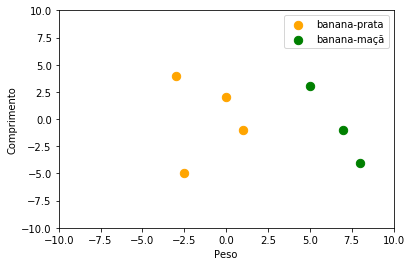

In [4]:
plot_amostras(dataset, plt)

## Incializando os parâmetros do neurônio

In [5]:
w = np.array([-0.5,0.2])
w0 = np.array([-0.2])

## Plotando a reta de separação definida pelo neurônio

In [6]:
def reta_neuronio(x1, w, w0):
    x2 = (-w[0]*x1 - w0)/w[1]
    return x2

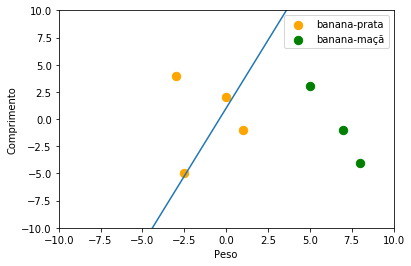

In [7]:
x1 = np.array(range(-20, 20))
x2 = reta_neuronio(x1, w, w0)
plt.plot(x1, x2)
plot_amostras(dataset, plt)

## Loop de treinamento

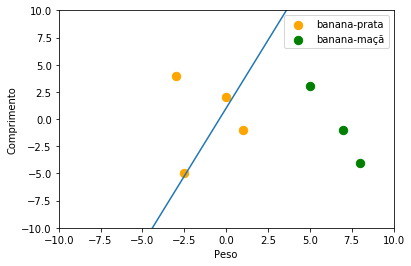

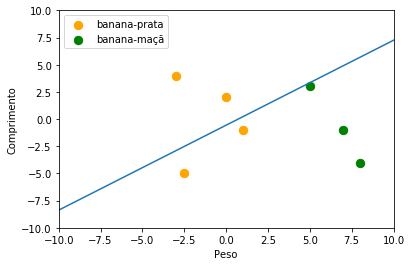

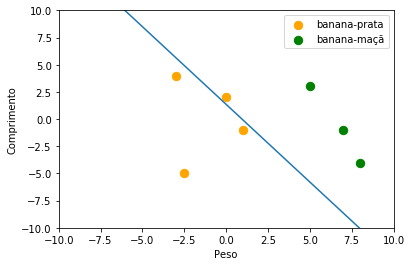

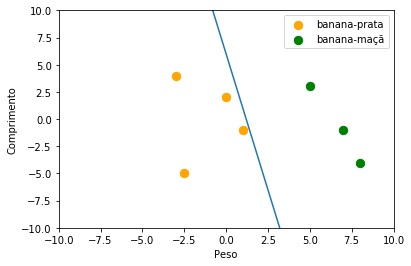

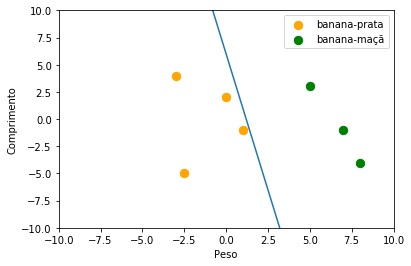

In [8]:
num_epocas = 5

for _ in range(num_epocas):
    x2 = reta_neuronio(x1, w, w0)
    plt.plot(x1, x2)
    plot_amostras(dataset, plt)
    plt.show()  
    for amostra in dataset:
        
        g = w[0]*amostra[1] + w[1]*amostra[2]  + w0
        
        if(g>0 and amostra[0]==0):
            w = w - amostra[1:]
            w0 = w0 - 1
            
        if(g<0 and amostra[0]==1):
            w = w + amostra[1:]
            w0 = w0 + 1
            
